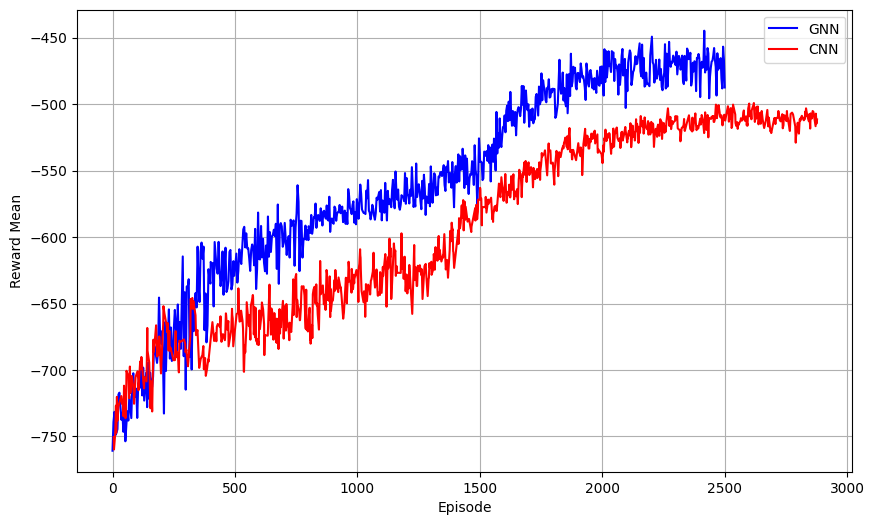

In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the CSV data
csv_file_path = 'test.csv'  # Change this to the path of your CSV file
data = pd.read_csv(csv_file_path)

# Parameters for each section
b1, b2, b3, b4_stronger = 0.01, 0.0025, 0.004, 0.005  # Growth rates for each section
c1_start, c1_end = -750, -630     # Range for the first section
c2_start, c2_end = -630, -590     # Range for the second section
c3_start, c3_end = -590, -550
c4_start, c4_end = -550, -470     # Range for the third section

# Arrays for each section with different lengths
n1 = np.linspace(0, 400, 100)
n2 = np.linspace(401, 800, 100)
n3 = np.linspace(801, 1500, 200)
n4 = np.linspace(1501, 2500, 300)

# Noise standard deviation functions
def noise_std_increasing(n, base_std, increase_rate):
    return base_std + increase_rate * (n - n[0])

# Linear interpolation functions for first two sections
def interpolate_linear(n, n_start, n_end, c_start, c_end, base_std, increase_rate):
    slope = (c_end - c_start) / (n_end - n_start)
    intercept = c_start - slope * n_start
    noise_std = noise_std_increasing(n, base_std, increase_rate)
    return slope * n + intercept + np.random.normal(0, noise_std)

# Exponential function for the third section
def interpolate_exponential(n, b, c_start, c_end, base_std, increase_rate):
    noise_std = noise_std_increasing(n, base_std, increase_rate)
    return (c_end - c_start) * (1 - np.exp(-b * (n - n[0]))) + c_start + np.random.normal(0, noise_std)

# Reward function models for each section with specified noise
R1 = interpolate_linear(n1, n1[0], n1[-1], c1_start, c1_end, 10, 0.05)
R2 = interpolate_linear(n2, n2[0], n2[-1], c2_start, c2_end, 15, -0.001)
R3 = interpolate_linear(n3, n3[0], n3[-1], c3_start, c3_end, 5, 0.01)
R4 = interpolate_exponential(n4, b4_stronger, c4_start, c4_end, 10, -0.001)

# Combining the sections
n_combined = np.concatenate((n1, n2, n3, n4))
R_combined = np.concatenate((R1, R2, R3, R4))

# Plotting the complete curve and overlaying CSV data
plt.figure(figsize=(10, 6))
plt.plot(n_combined, R_combined, color='blue', label='GNN', linestyle='-')
plt.plot(data['Step'], data['Value'], color='red', label='CNN', linestyle='-')
plt.xlabel('Episode')
plt.ylabel('Reward Mean')
plt.grid(True)
plt.legend()
plt.show()
